# **Librerías**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import scipy.stats as stats
#import stochastic_plots as stoch
#import arrival_process_simulation as arrival

# **Ejercicio 1**

Tenemos que ver que:

$P[N(t)=n] = \frac{1}{n!}λ^nt^ne^{-λt}$

## Paso 1.


Primero debemos construir una ecuación diferencial para $P[N(t)=0]$:

Teniendo en cuenta que $N(t)$ es independiente tenemos que:

> $P[N(t+\Delta t)=0] = P[N(t)=0, N(t+Δt) - N(t) = 0] \\ = P[N(t)=0] P[N(t+Δt) - N(t) = 0] \\= P[N(t)=0] P[N(Δt) = 0]$

Luego como $P[\Delta N(t)=0]= 1 - λΔt+o(Δt)$ tenemos que:

$P[N(t)=0] P[\Delta N(t) = 0] = P[N(t)=0][1- λΔt+o(Δt)]$

Tenemos que si calculamos $P[N(t-\Delta t)=0]$ es el mismo resultado. Por lo que $P[N(t)=0]$ es continuo. dividiendo por $Δ t$ ambos lados tenemos:

$\frac{P[N(t+\Delta t)=0] - P[N(t)=0]}{Δt} = -λP[N(t)=0] + \frac{o(h)}{h}$

Haciendo que $Δ t\rightarrow 0$ al ser continuo:

$P[N(t)=0]' = -λP[N(t)=0]\rightarrow \frac{P[N(t)=0]'}{P[N(t)=0]} = -\lambda$

Donde el termino o(Δt) desaparece ya que: $\lim_{Δt\rightarrow 0^+}=\frac{o(Δt)}{Δt}=0$

 Resolviendo la ecuación diferencial tenemos:

 $P[N(t)=0] = Ke^{-λt}$.

 Poniendo como condición inicial que  $P[N(0)=0] = 1$:

$P[N(t)=0] = e^{-λt}$.

## Paso 2

Ahora, se debe construir una ecuación diferencial para  P[N(t)=n]:

> $P[N(t + \Delta t)=n] = P[N(t)=n, N(t+Δt) - N(t) = 0] + P[N(t)=n - 1, N(t+Δt) - N(t) = 1]  + P[N(t)=n, N(t+Δt) - N(t) \geq 2] = (1 - \lambda Δt) P[N(t)=n] + \lambda Δt P[N(t)=n-1] + o(h)$

De nuevo, se puede ver que la $P[N(t)=n]$ es continua remplazando t por t-h y observando que es el mismo que el previamente calculado en el que se remplazó t por t+h. Devidiendo por $Δt$ y haciendo que tienda a 0, tenemos:

$P[N(t)=n]' = -λP[N(t)=n]+λP[N(t)=n-1]$

Tenemos,

$\frac{d}{dt}[e^{λt}P[N(t)=n]] = e^{λt} λ P[N(t)=n-1]$

Utilizando inducción sobre n, tenemos la hipótesis:

$P_{n-1}(t) = \frac{e^{-λt}(λt)^{n-1}}{(n-1)!}$

Si lo sustituimos en la anterior fórmula:

$\frac{d}{dt}[e^{λt}P[N(t)=n]] = \frac{λ(λt)^{n-1}}{(n-1)!}$

Lo que impolica que:

$e^{λt}P[N(t)=n] = \frac{(λt)^{n}}{n!} + c$

Donde de nuevo $P[N(0)=n] = 0$ y queda:

$P[N(t)=n] = e^{-λt}\frac{(λt)^{n}}{n!}$

Que es lo que queríamos demostrar.

Se compara el resultado obtenido por la simulación del proceso con el resultado teórico dado por la última ecuación. 

Para lo primero tenemos que hacer varias simulaciones y contar cuantos procesos han ocurrido en cada uno. 

Para lo segundo se puede ver que la fórmula corresponde a la función e probabilidad de una poisson con parámetro $λt$.

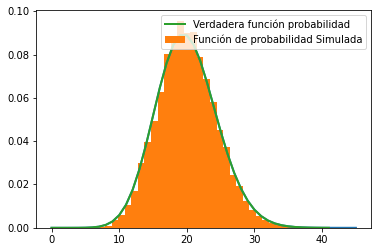

In [ ]:
# Poisson Process

lambda_rate = 10

t = 2.0

M = 10000

arrival_times = simulate_poisson(0, t, lambda_rate, M)
numero_llegadas = list(map(len, arrival_times))

plt.plot(xk,pmf,lw=2)

# Teórico
T = max(numero_llegadas) + 5
xk = np.arange(T)
pmf = stats.poisson.pmf(xk, lambda_rate*t)


plt.hist(numero_llegadas, label="Función de probabilidad Simulada", density=True, bins=33)
plt.plot(xk,pmf,lw=2, label="Verdadera función probabilidad")


#bin_count = np.bincount(numero_llegadas, minlength=T)
#plt.bar(xk, pmf, label="Verdadera función probabilidad")
#plt.bar(xk, bin_count/np.sum(bin_count), 
#              label="Función de probabilidad Simulada", alpha=0.8)
plt.legend()

# **Ejercicio 2** 
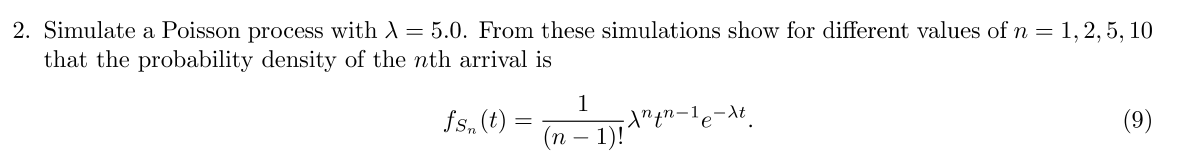

Vamos a simular un proceso de Poisson homogéneo. Haremos M simulaciones 

In [ ]:
lambda_rate = 5
t0 = 0.0
t1 = 2000.0
beta_scale = 1.0/lambda_rate
M = 10000 #number of simulations
ns = [1,2,5,10]

In [ ]:
## Method 2: Simulation based on the direct generation of arrival times
arrival_times = simulate_poisson(t0, t1, lambda_rate, M)

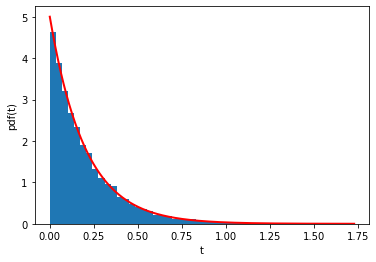

In [ ]:
# Plot interarrival times 
interarrival_times = np.diff(arrival_times[0])
def pdf(x): return stats.expon.pdf(x, loc = 0.0, scale = beta_scale)

plot_pdf(interarrival_times, pdf, fig_num=2)
_ = plt.xlabel('t')
_ = plt.ylabel('pdf(t)')

Definimos la función auxiliar "plot_arrival_pdf" para poder comparar la distribución de los tiempos de llegada con la pdf teórica de Erlang:

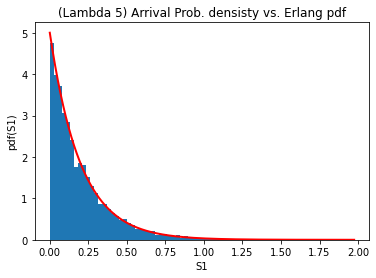

In [ ]:
# Show that the probability density of the nth arrival is... 
# for ns = [1,2,5,10]
#ns en función del los índices:
ns = [0,1,4,9]
n_1 = []
n_2 = []
n_5 = []
n_10 =[]

for m in range(M):
  values = np.take(arrival_times[m],ns)
  #sn=1 es el primer valor, indice 0
  n_1.append(values[0])
  n_2.append(values[1])
  n_5.append(values[2])
  n_10.append(values[3])

plot_arrival_pdf(X=n_1 ,n=1 ,lambd = lambda_rate, pdf = stats.erlang.pdf,max_bins=75, fig_num=1, fig_size=(4,4), font_size=10, title = '(Lambda 5) Arrival Prob. densisty vs. Erlang pdf')

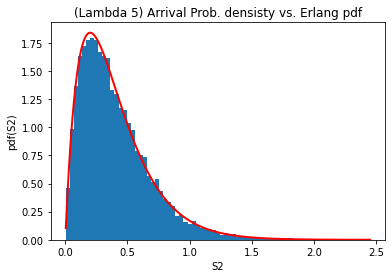

In [ ]:
plot_arrival_pdf(X=n_2 ,n=2 ,lambd = lambda_rate, pdf = stats.erlang.pdf,max_bins=75, fig_num=1, fig_size=(4,4), font_size=10,title = '(Lambda 5) Arrival Prob. densisty vs. Erlang pdf')

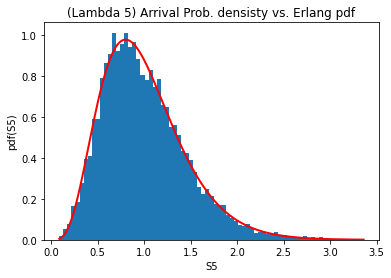

In [ ]:
plot_arrival_pdf(X=n_5 ,n=5 ,lambd = lambda_rate, pdf = stats.erlang.pdf,max_bins=75, fig_num=1, fig_size=(4,4), font_size=10, title = '(Lambda 5) Arrival Prob. densisty vs. Erlang pdf')

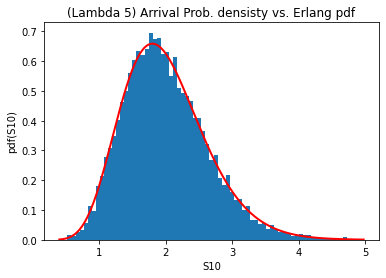

In [ ]:
plot_arrival_pdf(X=n_10 ,n=10 ,lambd = lambda_rate, pdf = stats.erlang.pdf,max_bins=75, fig_num=1, fig_size=(4,4), font_size=10, title = '(Lambda 5) Arrival Prob. densisty vs. Erlang pdf')

Comprobamos mediante simulación como la distribución de los tiempos de llegada para los sucecos S1,S2,S5 y S10, siguen un distribución Erlang, tal y como esperábamos teóricamente

# **Ejercicio 3**
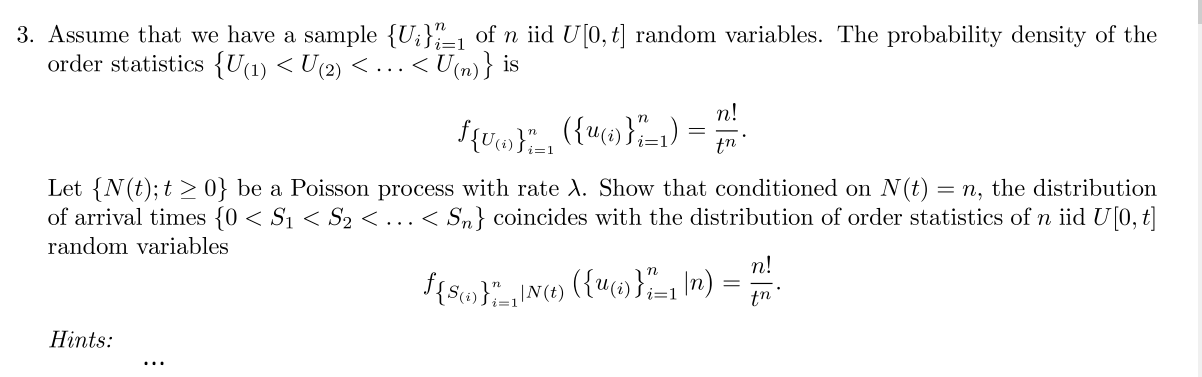

Usamos el teorema de Bayes con la regla de la cadena para calcular la densidad
$$
f_{\{S_{i}\}^{n+1}_{i=1} | N(t)} (\{s_{i}\}^{n+1}_{i=1} | n)  = 
f_{S_{n+1}| \{S_{i}\}^{n}_{i=1}, N(t)} (s_{n+1}| \{ s_{i}\}^{n}_{i=1},n)  
f_{\{S_{i}\}^{n}_{i=1} |N(t)} (\{ s_{i}\}^{n}_{i=1}|n)   
$$

Usando la propiedad de "memoryless" (proceso sin memoria) para $S_{n+1} > t$, convertimos el primer término de la ecuación anterior en :
$$f_{S_{n+1}| \{S_{i}\}^{n}_{i=1}, N(t)} (s_{n+1}| \{ s_{i}\}^{n}_{i=1},n) = 
f_{S_{n+1}|  N(t)} (s_{n+1}| n)
$$
Obteniendo:

$$
f_{\{S_{i}\}^{n+1}_{i=1} | N(t)} (\{s_{i}\}^{n+1}_{i=1} | n)  = 
f_{S_{n+1}|  N(t)} (s_{n+1}| n) 
f_{\{S_{i}\}^{n}_{i=1} |N(t)} (\{ s_{i}\}^{n}_{i=1}|n)   
$$

Para **el primer término:** ,aplicando Bayes , obtenemos:
$$ f_{S_{n+1}|  N(t)} (s_{n+1}| n) = 
\frac{P(n| S_{n+1}) f(S_{n+1})}{P(n)}$$

El conteo de sucesos N(t) sigue una distribución Poisson:
$$N(t) \sim Poisson(\lambda)$$
La probabilidad del denominador sustituimos por la función de masa de conteos de sucesos para un valor:

$$P(N(t) = n)= \frac{\lambda^{n}}{n!}t^{n}e^{-\lambda t}$$

Por otro lado, aplicando la definición de densidad de tiempos de llegada para $S{n+1}$, tenemos:
$$f_{S_{n+1}}(t) = \frac{t^{n}}{n!}\lambda^{n+1}e^{-\lambda t}$$




Reduciendo terminos, obtenemos:
$$ f_{S_{n+1}|  N(t)} (s_{n+1}| n) = 
P(n| S_{n+1}) \lambda $$

Para **el segundo término** ,aplicando Bayes , obtenemos:
$$ f_{\{S_{i}\}^{n}_{i=1} |N(t)} (\{ s_{i}\}^{n}_{i=1}|n) =
\frac{P(n| \{S_{i}\}^{n}_{i=1}) f(\{s_{i}\}^{n}_{i=1})}{P(n)}
$$


Aplicando la definición de función de densidad de tiempos de llegada conjunta al segundo factor, tenemos:
$$f(\{s_{i}\}^{n}_{i=1}) =  \lambda^{n} e^{- \lambda S_{n}}$$


Anulando términos de nuevo con $P(n)$, y sabiendo que $S_{n} = t$ obtenemos:
$$ f_{\{S_{i}\}^{n}_{i=1} |N(t)} (\{ s_{i}\}^{n}_{i=1}|n) = \frac{P(n| \{S_{i}\}^{n}_{i=1}) n!}{t^{n}}
$$

Juntado los dos términos de nuevo, y considerando que:
$$P(n| S_{n+1}) P(n| \{S_{i}\}^{n}_{i=1}) =  P(n| \{S_{i}\}^{n+1}_{i=1})$$

Tenemos que:
$$ f_{\{S_{i}\}^{n+1}_{i=1} | N(t)} (\{s_{i}\}^{n+1}_{i=1} | n)  = 
\frac{P(n| \{S_{i}\}^{n+1}_{i=1})  n! \lambda}{t^{n}}
$$

Sabiendo que $N(t)=n$ si y solo si: $s_{n} \leq t \leq s_{n+1} $, se cumple que:
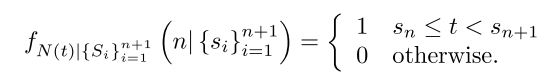

Por ello, nos queda:


$$ f_{\{S_{i}\}^{n+1}_{i=1} | N(t)} (\{s_{i}\}^{n+1}_{i=1} | n)  = 
\frac{  n! \lambda}{t^{n}} 
$$

Dado que entre $N(t + \tau) - N(t) \sim Poisson(\lambda\tau) $, tenemos que $E[N(t + \tau) - N(t)] = \lambda\tau$. Es decir, entre $S_{n}$ y $S_{n+1}$, hay un proceso de Poisson. Como para que se de $S_{n+1}$ , se tiene que dar $S_{n}$(operador multiplicación), tenemos finalmente que:


$$ f_{\{S_{i}\}^{n+1}_{i=1} | N(t)} (\{s_{i}\}^{n+1}_{i=1} | n)  = 
\frac{  n! }{t^{n}} 
$$

# **Ejercicio 4**
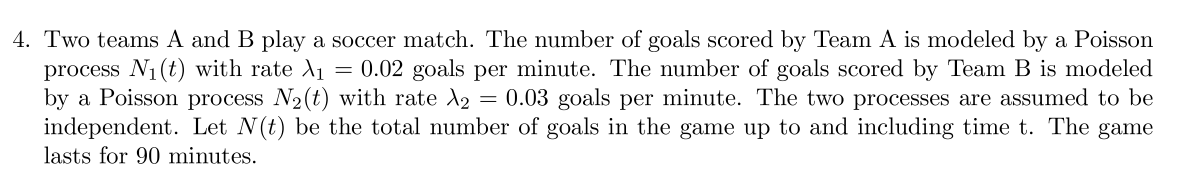



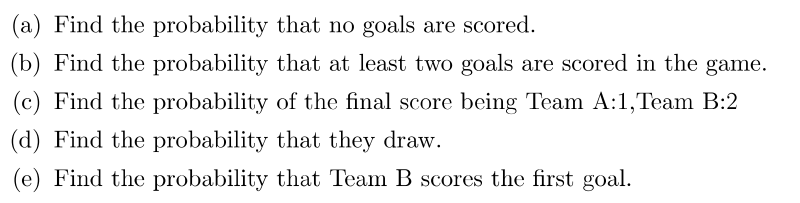

In [ ]:

t = 90.0
M = 10000

#Equipo A
lambda_A = 0.02
arrival_A = simulate_poisson(0, t, lambda_A, M)
goles_A = np.fromiter(map(len, arrival_A), dtype=np.int)

#Equipo B
lambda_B = 0.03
arrival_B = simulate_poisson(0, t, lambda_B, M)
goles_B = np.fromiter(map(len, arrival_B), dtype=np.int)

# Goles Totales
goles = goles_A + goles_B

##(a) 

*Probabilidad de que al final del partido (t=90) no se marquen goles.*

> $P[N(90)=0] = \frac{1}{0!}λ^0t^0e^{-\lambda t}= e^{-(\lambda_1+\lambda_2)t}=e^{-0.05\cdot 90}$

Calculando este valor:

In [ ]:
print("P[N(90)=0] = ",np.exp(-0.05*90))

P[N(90)=0] =  0.011108996538242306


### Simulación:

In [ ]:
p1 = np.count_nonzero(goles==0)/goles.shape[0]
p1

0.011

## (b)
Probabilidad de que al final del partido se hayan metido al menos 2 goles.

> $P[N(90)\geq 2] = 1 - P[N(90) = 0] - P[N(90) = 1] = 1 - \frac{1}{1!}λte^{-\lambda t} - P[N(90)=0] = 1 - 4.5e^{-4.5} - e^{-4.5}$


In [ ]:
print("P[N(90)>=2] = ", 1 - np.exp(-0.05*90)*(4.5 + 1))

P[N(90)>=2] =  0.9389005190396673


### Simulación:

In [ ]:
p2 = np.count_nonzero(goles>=2)/goles.shape[0]
p2

0.9396

## (c)
Probabilidad de que el equipo A marque 1 y el B marque 2.


> $P[N_1(90) = 1, N_2(90) = 2] = P[N_1(90) = 1] P[N_(90) = 2] = \frac{1}{1!}λ_1te^{-\lambda_1 t} + \frac{1}{2!}λ_2^2t^2e^{-\lambda_2 t} = 0.02\cdot 90e^{-0.02\cdot 90} \cdot \frac{0.03^2\cdot 90^2}{2}e^{-0.03\cdot 90} $


In [ ]:
print("P[N_1(90)=1, N_2(90)=2] = ", 0.02*90*np.exp(-0.02*90) * ((0.03**2*90**2)/2)*np.exp(-0.03*90))

P[N_1(90)=1, N_2(90)=2] =  0.0728861262874078


### Simulación:

In [ ]:
p3 = np.count_nonzero(goles_A==1)/goles_A.shape[0] * np.count_nonzero(goles_B==2)/goles_B.shape[0]
p3

0.07388064000000001

## (d)
Probabilidad de marcar los mismos goles.

 Tenemos que la probabilida de que se marquen los mismos goles es que:

>P[N_1(90) - N_2(90) = 0]

La resta de dos procesos sigue una distribución Skellam:

>$P[N_1(90) - N_2(90) = 0] = (\frac{\lambda_1}{\lambda_2})^0e^{-t\lambda}I_0(2t\sqrt{λ_1λ_2}) = e^{-90\cdot0.05}I_0 2\cdot 90\sqrt{0.02\cdot 0.03}$

Donde $I_0$ es la función de bessel de primer tipo de orden 0.

In [ ]:
import scipy

print("P[N_1(90) - N_2(90) = 0] = ", np.exp(-0.05*90) * scipy.special.iv(0,2 * 90 * np.sqrt(0.02*0.03)))

P[N_1(90) - N_2(90) = 0] =  0.1792828391297787


In [ ]:
p4 = np.count_nonzero(goles_A==goles_B)/goles_A.shape[0]
p4

0.1814

## (e)
 Encuentra la probabilidad de que B marque el primer gol.

Para ello tenemos que encontrar la probabilidad de que el tiempo en marcar un gol de B sea menor que el de A.

> $P(t_A > t_B) = \int_0^{90}f_{t_B}(t)P(t_A>t_B | t_B = t) dt$

donde, 

> $P(t_A>t_B | t_B = t) = \int_t^{\infty}λ_Ae^{-lambda_Bx}dx=e^{-\lambda_Bt}$

Por lo que,

> $P(t_A > t_B) = \int_0^{90} λ_A e^{-(\lambda_B + \lambda_A)t} dt = \int_0^{90} 0.03 e^{-0.05t} dt = - \frac{0.03}{0.05}(e^{-0.05\cdot 90} - 1)$ 






In [ ]:
print("P(t_A > t_B) = ", (-0.03/0.05)*(np.exp(-0.05*90) -1))

P(t_A > t_B) =  0.5933346020770546


In [ ]:
p5 = np.fromiter(map(lambda x,y: int(y[0]<x[0]) if x.size != 0 and y.size != 0 else 1 if  x.size == 0 and  y.size != 0 else 0, arrival_A, arrival_B), dtype=np.int)
np.mean(p5)

0.5995

# **Ejercicio 5**

## a)
Z sigue una $N(0, 1)$

> $X(t)= Z \sqrt{t}$ 

Que sigue otra normal donde la esperanza es igual:

$E[X(t)] = \sqrt{t}E[Z] = 0$

Y la varianza es igual a:

> $Var[X(t)] = t\cdot Var[Z] = t$

Y la STD será $\sqrt{t}$. Por lo que:

> $X(t) ~ N(0,\sqrt{t})$

## b)

Como el valor de z es igual para todos los tiempos, no existe independencia entre tiempos ya que serán proporcionales al z inicial.

# **Ejercicio 6**

## a) 

Tenemos que $t<s$, 

$\gamma(t,s) = E[W(t)W(s)] = E[W(t)(W(s)-W(t)+W(t))]=E[W(t)(W(s)-W(t))]+E[W(t)^2] = E[(W(s)-W(t))(W(t)-W(0))] +E[W(t)^2]$

Donde utilizando la propiedad del enunciado tenemos,

 $E[W(t)]E[W(s)-W(t)]+E[W(t)^2] = E[W(t)](E[W(s)]-E[W(t)])+E[W(t)^2] = E[W(t)^2]$ 

 Donde $E[W(t)] = 0$ y $W(t)$ y $W(s)$ son independientes entonces $E[W(s)-W(t)]= E[W(s)]-E[W(t)]= 0 - 0$ por definición de proceso Wiener. Por lo que,

 $\gamma(t,s) = E[W(t)^2] = E[W(t)^2] - E[W(t)]^2 = Var(W(t)) =  t$

 Que es el mínimo de t y s. Si hacemos lo propio con $s<t$ el resultado será s. 

## b)

> $Cov[W(t), W(s)] = E[(W(t)-μ_{W(t)})(W(s)-μ_{W(s)})]$

In [ ]:
# Wierner [0,1]
# sample estimate
#Theorical Values cov(t,0.25) con t de 0 a 1

t0, B0, T, mu, sigma = 0, 0.0, 1.0, 0, 1
M, N = 10000, 1000

t, W1 = simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N)

s = int(0.25 * N)

cov_s = W1[:, s] - np.mean(W1[:, s])

covarianza = np.dot(W1.T - W1.mean(), cov_s) / (W1.shape[0]-1)

In [ ]:
covarianza

array([-7.80703635e-22,  1.14589448e-03,  2.04103852e-03, ...,
        2.48686930e-01,  2.48687151e-01,  2.48590901e-01])

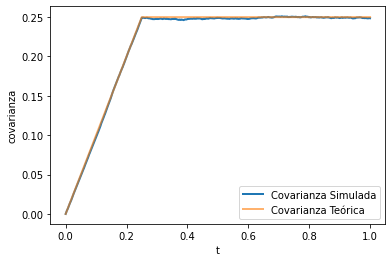

In [ ]:
plt.plot(t, covarianza, lw=2, label="Covarianza Simulada")
plt.plot(t, np.minimum(t,0.25), lw=2, alpha=0.6, label="Covarianza Teórica")
plt.xlabel("t")
plt.ylabel("covarianza")
plt.legend()
plt.show()

# **Ejercicio 7**
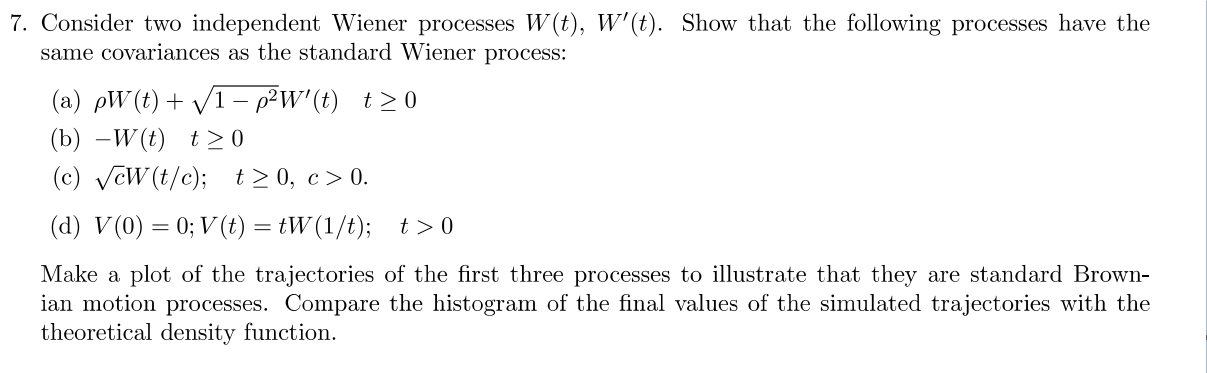

In [ ]:
t0, B0, T, mu, sigma = 0, 0.0, 2.0, 0, 1
M, N = 10000, 1000

t, W1 = simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N)
t, W2 = simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N)

Se debe demostrar que los nuevos procesos cumple la matriz de covarianza de un proceso de Wiener:

> $Cov[W(t), W(s)] = min(t, s)$

La covarianza se puede  calcular con la fórmula:

> $Cov[W(t), W(s)] = E[(W(t)-μ_{W(t)})(W(s)-μ_{W(s)})]$

### a)
Tenemos que la esperanza de $V_1$ es:

$E[V_1] = \rho E[W] + \sqrt{1-\rho^2}E[W']$

Donde las esperanzas de $E[W']$ y $E[W]$ son 0. Por lo que $E[V_1]=0$. Por lo que la covarianza quedará como:

> $Cov[V(t), V(s)] = E[V(t)V(s)] = \rho^2E[W(t)W(s)] + \rho\sqrt{1-\rho^2}E[W(t)W'(s)]  + \rho\sqrt{1-\rho^2}E[W'(t)W(s)] + (1-\rho^2)E[W'(t)W'(s)]$

Donde $E[W(t)W(s)] = Cov(W(t)W(s)) = min(t,s)$ al igual que con $E[W'(t)W'(s)]$. Y $E[W'(t)W(s)] = E[W(t)W'(s)] = 0$ al ser dos procesos independientes.

> $Cov[V(t), V(s)] = \rho^2 min(t,s) + (1-\rho^2)min(t,s)= min(t,s)$

Text(0.5, 1.0, 'Arithmetic Brownian motion in 1D')

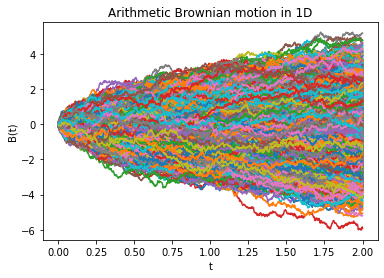

In [ ]:
rho = 0.5
v1 = rho * W1 + np.sqrt(1 - rho**2)*W2
plt.plot(t,v1.T)
plt.xlabel('t')
plt.ylabel('B(t)') 
plt.title('Arithmetic Brownian motion in 1D')

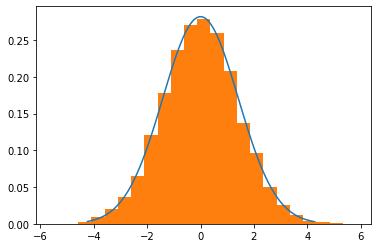

In [ ]:
mu_n = B0 + mu*T
sigma_n= sigma*np.sqrt(T)
x = np.linspace(mu_n - 3*sigma_n, mu_n + 3*sigma_n, 100)
plt.plot(x, stats.norm.pdf(x, mu_n, sigma_n))
plt.hist(v1[:,-1], bins= 23, density=True)
plt.show()



### b) 

Tenemos que la esperanza de $V_2$ es de nuevo 0. Por lo que la covarianza quedará como:

> $Cov[V(t), V(s)] = E[V(t)V(s)] = E[W(t)W(s)] = min(t,s)$


Text(0.5, 1.0, 'Arithmetic Brownian motion in 1D')

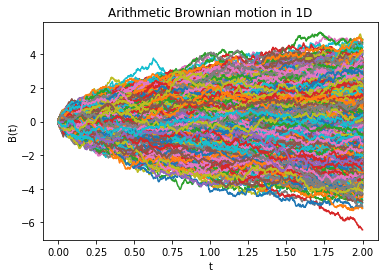

In [ ]:
import matplotlib.pyplot as plt

v2 = -W1 
plt.plot(t,v2.T)
plt.xlabel('t')
plt.ylabel('B(t)') 
plt.title('Arithmetic Brownian motion in 1D')

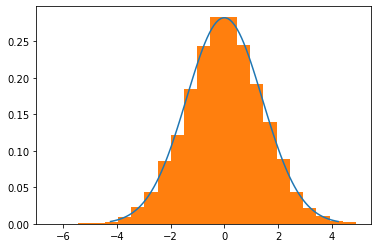

In [ ]:
mu_n = B0 + mu*T
sigma_n= sigma*np.sqrt(T)
x = np.linspace(mu_n - 3*sigma_n, mu_n + 3*sigma_n, 100)
plt.plot(x, stats.norm.pdf(x, mu_n, sigma_n))
plt.hist(v2[:,-1], bins= 23, density=True)
plt.show()

### c)


Tenemos que la esperanza de $V_3$ es de nuevo 0. Por lo que la covarianza quedará como:

> $Cov[V(t), V(s)] = E[V(t)V(s)] = cE[W(t/c)W(s/c)] = c\cdot min(\frac{t}{c},\frac{s}{c})=min(t,s)$


Text(0.5, 1.0, 'Arithmetic Brownian motion in 1D')

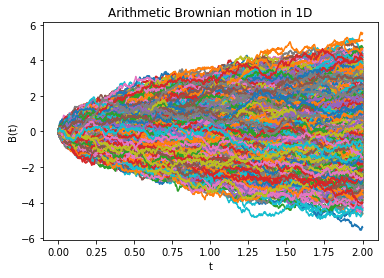

In [ ]:

c = 5

t, W1 = simulate_arithmetic_BM(t0, B0, T / c, mu, sigma, M, N)

v3 = np.sqrt(c) *  W1 
plt.plot(t * c,v3.T)
plt.xlabel('t')
plt.ylabel('B(t)') 
plt.title('Arithmetic Brownian motion in 1D')

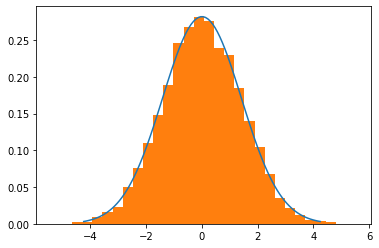

In [ ]:
mu_n = B0 + mu*T
sigma_n= sigma*np.sqrt(T)
x = np.linspace(mu_n - 3*sigma_n, mu_n + 3*sigma_n, 100)
plt.plot(x, stats.norm.pdf(x, mu_n, sigma_n))
plt.hist(v3[:,-1], bins= 30, density=True)
plt.show()

### d)


$V_4(0) = 0$

$V_4(t) = tW(\frac{1}{t})$

Tenemos que la esperanza de $V_4$ es de nuevo 0. Por lo que la covarianza quedará como:

Si min(s, t) = 0

> $Cov[V(t), V(s)] =  E[V(t)V(s)] = t \cdot s \cdot E[W(t)W(s)] = 0$

Si min(s, t) > 0

> $Cov[V(t), V(s)] =  E[V(t)V(s)] =  t\cdot s \cdot E[W(\frac{1}{t})W(\frac{1}{s})] = t\cdot s \cdot min(\frac{1}{t},\frac{1}{s}) = min(t, s)$

# **Ejercicio 8**

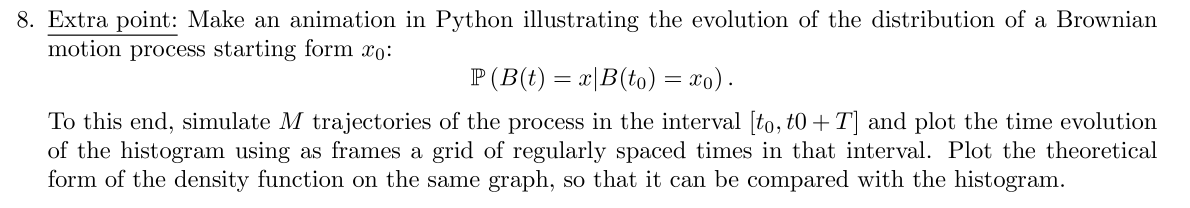

In [ ]:
import pandas as pd


t0, B0, T, mu, sigma = 0, 0.0, 100.0, 0, 1
M, N = 10000, 100

t, W = simulate_arithmetic_BM(t0, B0, i, mu, sigma, M, N)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning:

invalid value encountered in true_divide



/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning:

invalid value encountered in true_divide



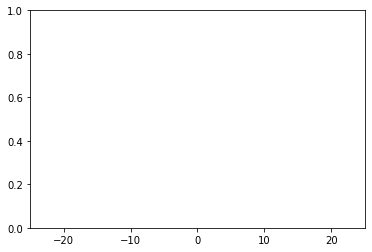

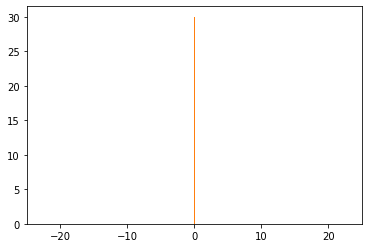

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


number_of_frames = 100

plt.xlim([-25, 25])

def update_hist(num, data, t):
    plt.cla()
    mu_n = B0 + mu*t[num]
    sigma_n= sigma*np.sqrt(t[num])
    x = np.linspace(mu_n - 3*sigma_n, mu_n + 3*sigma_n, 100)
    plt.plot(x, stats.norm.pdf(x, mu_n, sigma_n))
    plt.xlim([-25, 25])
    plt.hist(W[:,num], bins= 30, density=True)

fig = plt.figure()
hist = plt.hist(W[:,0], bins= 30, density=True)

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(W, t) )
HTML(animation.to_html5_video())

# **Código Auxiliar**

In [ ]:
#arrival_process_simulation.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 27 19:50:45 2020

@author: alberto
"""

# Load packages
import numpy as np
import matplotlib.pyplot as plt


def plot_trajectories(t, X, 
                      max_trajectories=20, 
                      fig_num=1, fig_size=(8,4), font_size=10, mean_color='k'):

    M, N = np.shape(X)
    # Plot trajectories 
    M = np.min((M, max_trajectories))
    fig = plt.figure(fig_num)
    fig.clf()
    plt.plot(t, X[:M,:].T, linewidth=1)
    plt.xlabel('t', fontsize=font_size)
    plt.ylabel('X(t)', fontsize=font_size)
    plt.title('Simulation', fontsize=font_size)
  
    plt.plot(t, np.mean(X, axis=0), linewidth=3, color=mean_color)
  
    
  
    
def plot_pdf(X, pdf,
             max_bins=50,
             fig_num=1, fig_size=(4,4), font_size=10):


    # Plot histogram
    fig = plt.figure(fig_num)
    fig.clf()
    n_bins = np.min((np.int(np.round(np.sqrt(len(X)))), max_bins))
       
    plt.hist(X, bins=n_bins, density=True)
    plt.xlabel('x', fontsize=font_size)
    plt.ylabel('pdf(x)', fontsize=font_size)
    
    # Compare with exact distribution
    n_plot = 1000
    x_plot = np.linspace(np.min(X), np.max(X),n_plot)
    y_plot = pdf(x_plot)
    plt.plot(x_plot, y_plot, linewidth=2, color='r')
    



# -*- coding: utf-8 -*-
"""
Created on Sun Oct 25 13:08:31 2020

@author: alberto
"""
# Load packages
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad

def simulate_poisson(t0, t1, lambda_rate, M):
    """ Simulation of homogeneours Poisson process in [t0, t1]
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    t1 : float
        Final time for the simulation
    M: int
        Number of count sequences in simulation
            
    Returns
    -------
    times: list of M lists 
        Simulation consisting of M sequences (lists) of arrival times.
 
    Examples
    -------
    >>> import matplotlib.pyplot as plt
    >>> import arrival_process_simulation as arrival
    >>> import numpy as np
    >>> lambda_rate = 0.5
    >>> t0 = 0.0
    >>> t1 = 200.0
    >>> M = 3 
    >>> arrival_times = arrival.simulate_poisson(t0, T, lambda_rate, M)
    >>> fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10,8))
    >>> for m in range(M):
    >>>      axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

    """
    
    arrival_times = [ [] for _ in range(M) ]
    lambda_rate_global = lambda_rate*(t1-t0) 
    n =  np.random.poisson(lambda_rate_global, size=M)
    for m in range(M):
        arrival_times[m] = np.sort(t0 + (t1-t0)*np.random.rand(n[m]))
 
    return arrival_times



def simulate_inhomogeneous_poisson(t0, t1, 
                                   lambda_rate_fn, integrated_lambda_rate_fn, 
                                   M):
    """ Simulation of homogeneours Poisson process in [t0, t1]
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    t1 : float
        Final time for the simulation
    lambda_rate_fn: callable
        Function of t that retruns the instantaneous rate
    integrated_lambda_rate_fn: callable
       Function of `s` and `t` that returns the integrated rate in [s,t]
    M: int
        Number of count sequences in simulation
            
    Returns
    -------
    times: list of M lists 
        Simulation consisting of M sequences (lists) of arrival times.
 
    Example 1
    ---------

    >>> from scipy.integrate import quad
    >>> from scipy.stats import expon
    >>> import matplotlib.pyplot as plt
    >>> import stochastic_plots as stoch
    >>> import arrival_processs_simulation as arrival

    >>> t0 = 0.0
    >>> t1 = 2000.0
    >>> M = 3 
    >>> lambda_rate = 0.5
    >>> beta_scale = 1.0/lambda_rate
    >>> def lambda_rate_fn(t): return lambda_rate
    >>> def integrated_lambda_rate_fn(s,t): return (lambda_rate * (t-s))

    >>> arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
    >>> fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10,8))
    >>> for m in range(M):
            axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))
    >>> 
    >>> interarrival_times = np.diff(arrival_times[0])
    >>> def pdf(x): return expon.pdf(x, loc = 0.0, scale = beta_scale)

    >>> stoch.plot_pdf(interarrival_times, pdf, fig_num=2)
    >>> _ = plt.xlabel('t')
    >>> _ = plt.ylabel('pdf(t)')

    Example 2
    ---------

    >>> from scipy.integrate import quad
    >>> from scipy.stats import expon
    >>> import matplotlib.pyplot as plt
    >>> import stochastic_plots as stoch
    >>> import arrival_process_simulation as arrival

    >>> t0 = 0.0
    >>> t1 = 2000.0
    >>> M = 3 
    >>> def lambda_rate_fn(t): return 1.0001 + np.sin(0.01*t)
    >>> def integrated_lambda_rate_fn(s,t): return quad(lambda_rate_fn, s, t)[0]

    >>> arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
    >>> fig, axs = plt.subplots(M+2, sharex=True, num=1, figsize=(10,8))
    >>> for m in range(M):
            axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

    >>> n_plot = 1000
    >>> t_plot = np.linspace(t0,t1,n_plot)
    >>> _ = axs[M].hist(arrival_times[0], bins=50, density=True)
    >>> _ = axs[M+1].plot(t_plot, lambda_rate_fn(t_plot))
    
    """
    
    arrival_times = [ [] for _ in range(M) ]
    
    for m in np.arange(M):
        arrival_time = t0 
        
        while True:
            target = np.random.exponential(1)
            def f_target(t): 
                return integrated_lambda_rate_fn(arrival_time,t) - target
                       
            arrival_time = newton(f_target, x0=arrival_time, 
                                  fprime=lambda_rate_fn)     
            
            if (arrival_time > t1):
                break               
            
            arrival_times[m].append(arrival_time)

    return arrival_times



def simulate_inhomogeneous_poisson_2(t0, t1, 
                                   lambda_rate_fn,
                                   M):
    """ Simulation of homogeneours Poisson process in [t0, t1]
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    t1 : float
        Final time for the simulation
    lambda_rate_fn: callable
        Function of t that retruns the instantaneous rate
    integrated_lambda_rate_fn: callable
       Function of `s` and `t` that returns the integrated rate in [s,t]
    M: int
        Number of count sequences in simulation
            
    Returns
    -------
    times: list of M lists 
        Simulation consisting of M sequences (lists) of arrival times.
 
    Example 1
    ---------

    >>> from scipy.integrate import quad
    >>> from scipy.stats import expon
    >>> import matplotlib.pyplot as plt
    >>> import stochastic_plots as stoch
    >>> import arrival_process_simulation as arrival

    >>> t0 = 0.0
    >>> t1 = 2000.0
    >>> M = 3 
    >>> lambda_rate = 0.5
    >>> beta_scale = 1.0/lambda_rate
    >>> def lambda_rate_fn(t): return lambda_rate
    >>> def integrated_lambda_rate_fn(s,t): return (lambda_rate * (t-s))

    >>> arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
    >>> fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10,8))
    >>> for m in range(M):
            axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))
    >>> 
    >>> interarrival_times = np.diff(arrival_times[0])
    >>> def pdf(x): return expon.pdf(x, loc = 0.0, scale = beta_scale)

    >>> stoch.plot_pdf(interarrival_times, pdf, fig_num=2)
    >>> _ = plt.xlabel('t')
    >>> _ = plt.ylabel('pdf(t)')

    Example 2
    ---------

    >>> from scipy.integrate import quad
    >>> from scipy.stats import expon
    >>> import matplotlib.pyplot as plt
    >>> import stochastic_plots as stoch
    >>> import arrival_process_simulation as arrival

    >>> t0 = 0.0
    >>> t1 = 2000.0
    >>> M = 3 
    >>> def lambda_rate_fn(t): return 1.0001 + np.sin(0.01*t)
    >>> def integrated_lambda_rate_fn(s,t): return quad(lambda_rate_fn, s, t)[0]

    >>> arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
    >>> fig, axs = plt.subplots(M+2, sharex=True, num=1, figsize=(10,8))
    >>> for m in range(M):
            axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

    >>> n_plot = 1000
    >>> t_plot = np.linspace(t0,t1,n_plot)
    >>> _ = axs[M].hist(arrival_times[0], bins=50, density=True)
    >>> _ = axs[M+1].plot(t_plot, lambda_rate_fn(t_plot))
    
    """
    def rejection_sampling(lambda_rate_fn, t0,t1, N):
        n_max = 10000
        t = np.linspace(t0, t1, n_max)
        maximum_lambda_rate = np.max(lambda_rate_fn(t))
        
        arrival_times = np.zeros(N)
        n = 0
        while n < N:
            arrival_time = t0 + (t1-t0)*np.random.rand()
            threshold = lambda_rate_fn(arrival_time)
            if  (maximum_lambda_rate*np.random.rand() < threshold):
                arrival_times[n] = arrival_time
                n = n + 1
        return arrival_times        
                
     
    lambda_rate_global = quad(lambda_rate_fn,t0,t1)[0]
    n =  np.random.poisson(lambda_rate_global, size=M)
    
    arrival_times = [ [] for _ in range(M) ]

    for m in range(M):
        arrival_times[m] = np.sort(rejection_sampling(lambda_rate_fn, t0,t1, n[m]))
 
    return arrival_times

In [ ]:
#stochastic_plots.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 27 19:50:45 2020

@author: alberto
"""

def plot_trajectories(t, X, 
                      max_trajectories=20, 
                      fig_num=1, fig_size=(8,4), font_size=10, mean_color='k'):

    M, N = np.shape(X)
    # Plot trajectories 
    M = np.min((M, max_trajectories))
    fig = plt.figure(fig_num)
    fig.clf()
    plt.plot(t, X[:M,:].T, linewidth=1)
    plt.xlabel('t', fontsize=font_size)
    plt.ylabel('X(t)', fontsize=font_size)
    plt.title('Simulation', fontsize=font_size)
  
    plt.plot(t, np.mean(X, axis=0), linewidth=3, color=mean_color)
  
    
  
    
def plot_pdf(X, pdf,
             max_bins=50,
             fig_num=1, fig_size=(4,4), font_size=10, title = ''):


    # Plot histogram
    fig = plt.figure(fig_num)
    fig.clf()
    n_bins = np.min((np.int(np.round(np.sqrt(len(X)))), max_bins))
       
    plt.hist(X, bins=n_bins, density=True)
    plt.xlabel('x', fontsize=font_size)
    plt.ylabel('pdf(x)', fontsize=font_size)
    plt.title(title)
    
    # Compare with exact distribution
    n_plot = 1000
    x_plot = np.linspace(np.min(X), np.max(X),n_plot)
    y_plot = pdf(x_plot)
    plt.plot(x_plot, y_plot, linewidth=2, color='r')
    


    
def plot_arrival_pdf(X,n, lambd ,pdf,
             max_bins=50,
             fig_num=1, fig_size=(4,4), font_size=10, title = ''):


    # Plot histogram
    fig = plt.figure(fig_num)
    fig.clf()
    n_bins = np.min((np.int(np.round(np.sqrt(len(X)))), max_bins))
       
    plt.hist(X, bins=n_bins, density=True)
    plt.xlabel('S' + str(n), fontsize=font_size)
    plt.ylabel('pdf(S' + str(n) + ')' , fontsize=font_size)
    plt.title(title)
    
    # Compare with exact distribution
    n_plot = 10000
    x_plot = np.linspace(np.min(X), np.max(X),n_plot)
    scale = 1.0 / lambd
    y_plot = pdf(x_plot,n,scale = scale)
    plt.plot(x_plot, y_plot, linewidth=2, color='r')

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 27 17:29:26 2020

@author: Alberto Suárez
"""
# Load packages
import numpy as np


def simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N):
    """ Simulation in [t0,t0+T] of arithmetic Brownian motion trajectories

        SDE:    dB(t) = mu*dt + sigma*dW(t)
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    B0 : float
        Initial level of the process
    T : float
        Length of the simulation 
    mu, sigma : float
        Parameters of the process
    M : int
        Number of trajectories in simulation
    N : int
        Number of steps for the simulation
            
    Returns
    -------
    t: numpy.ndarray [float] of shape (N+1,)
        Regular grid of discretization times in [t0,t0+T]
    B: numpy.ndarray [float] of shape (M, N+1)
        Simulation consisting of M trajectories.
        Each trajectory is a row vector composed of the values of the process at t 
        

    Example
    -------
    >>> import matplotlib.pyplot as plt
    >>> import BM_simulators as BM
    >>> t0, B0, T, mu, sigma = 0, 10.0, 2.0, 1.5, 0.4
    >>> M, N = 20, 1000
    >>> t, B = BM.simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N)
    >>> _ = plt.plot(t,B.T)
    >>> _= plt.xlabel('t')
    >>> _=  plt.ylabel('B(t)') 
    >>> _= plt.title('Arithmetic Brownian motion in 1D')

    """
    
    dT = T / N    # integration step
    t = np.linspace(t0, t0+T, N+1) # integration grid
    Z = np.random.randn(M, N)    # Gausssian White noise
    d = mu*dT + sigma*np.sqrt(dT)*Z  # additive factor
    B = np.concatenate((B0*np.ones((M, 1)), d), axis=1)
    B = np.cumsum(B, axis=1)
    return t, B

def simulate_geometric_BM(t0, S0, T, mu, sigma, M, N):
    """ Simulation in [t0,t0+T] of geometric Brownian motion trajectories

        SDE:    dS(t) = mu*S(t)*dt + sigma*S(t)*dW(t)
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    S0 : float
        Initial level of the process
    T : float
        Length of the simulation 
    mu, sigma : float
        Parameters of the process
    M: int
        Number of trajectories in simulation
    N: int
        Number of steps for the simulation
            
    Returns
    -------
    t: numpy.ndarray of shape (N+1,)
        Regular grid of discretization times in [t0,t0+T]
    S: numpy.ndarray of shape (M,N+1)
        Simulation consisting of M trajectories.
        Each trajectory is a row vector composed of the values of the process at t 

    Example
    -------
    >>> import matplotlib.pyplot as plt
    >>> import BM_simulators as BM
    >>> t0, S0, T, mu, sigma = 0, 10.0, 2.0, 0.3, 0.4
    >>> M, N = 20, 1000
    >>> t, S = BM.simulate_geometric_BM(t0, S0, T, mu, sigma, M, N)
    >>> _ = plt.plot(t,S.T)
    >>> _= plt.xlabel('t')
    >>> _=  plt.ylabel('S(t)') 
    >>> _= plt.title('Geometric Brownian motion in 1D')

    """
    
    dT = T / N    # integration step
    t = np.linspace(t0, t0+T, N+1) # integration grid
    Z = np.random.randn(M, N)  # Gausssian White noise
    e = np.exp((mu-0.5*sigma**2)*dT + sigma*np.sqrt(dT)*Z) # multiplicative factor
    S = np.concatenate((S0*np.ones((M, 1)), e), axis=1)
    S = np.cumprod(S, axis=1)
    return t, S

def simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N):
    """ Simulation in [t0,t1] of Brownian bridge trajectories
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    B0 : float
        Initial level of the process
    t1 : float
        Final time for the simulation
    B1 : float
        Final level of the process
    sigma : float
        Parameter of the process
    M: int
        Number of trajectories in simulation
    N: int
        Number of steps for the simulation
            
    Returns
    -------
    t: numpy.ndarray of shape (N+1,)
        Regular grid of discretization times in [t0,t1]
    BB: numpy.ndarray of shape (M,N+1)
        Simulation consisting of M trajectories.
        Each trajectory is a row vector composed of the values of the process at t 

    Example
    -------

    >>> import matplotlib.pyplot as plt
    >>> import BM_simulators as BM
    >>> t0, B0, t1, B1, sigma = 0, 10.0, 2.0, 12.0, 0.4
    >>> M, N = 20, 1000
    >>> t, BB = BM.simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N)
    >>> _ = plt.plot(t,BB.T)
    >>> _= plt.xlabel('t')
    >>> _=  plt.ylabel('BB(t)') 
    >>> _= plt.title('Brownian bridge')
    
    """       
    
    t, B = simulate_arithmetic_BM(t0, B0, t1-t0, 0, sigma, M, N)
    B_t1 = B[:,-1]
    BB = B + np.multiply.outer(B1 - B_t1, (t-t0) / (t1-t0))
    return t, BB

def simulate_Ornstein_Uhlenbeck(t0, X0, T, k, D, M, N):
    """ Simulation in [t0, t0+T] of Ornstein-Uhlenbeck process trajectories
    
        SDE:    dX(t) = - k*X(t)*dt + sqrt(D)*dW(t)
    
    
    Parameters
    ----------
    t0 : float
        Initial time for the simulation
    X0 : float
        Initial level of the process
    T : float
        Length of the simulation 
    k : float
        Rate or inverse correlation time of the process
    D : float
        Diffusion constant
    M: int
        Number of trajectories in simulation
    N: int
        Number of steps for the simulation
            
    Returns
    -------
    t: numpy.ndarray of shape (N+1,)
        Regular grid of discretization times in [t0,t0+T]
    X: numpy.ndarray of shape (M,N+1)
        Simulation consisting of M trajectories.
        Each trajectory is a row vector composed of the values of the process at t
    
    Example
    -------
    >>> import matplotlib.pyplot as plt
    >>> import BM_simulators as BM
    >>> t0, X0, T, k, D = [0.0, 10.0, 20.0, 0.5, 0.4]
    >>> M, N = 20, 1000
    >>> t, X = BM.simulate_Ornstein_Uhlenbeck(t0, X0, T, k, D, M, N)
    >>> _ = plt.plot(t,X.T)
    >>> _= plt.xlabel('t')
    >>> _=  plt.ylabel('X(t)') 
    >>> _= plt.title('Ornstein-Uhlenbeck process')
    
    """

    dT = T / N    # integration step
    t = np.linspace(t0, t0+T, N+1) # integration grid
    
    Z = np.random.randn(M, N)    # Gausssian White noise
    
    X = np.zeros((M,N+1))
    X[:,0] = X0

    sigma = np.sqrt(D / k * (1.0 - np.exp(-2.0*k*dT)))

    for n in np.arange(N):
        X[:,n+1] = X[:,n]*np.exp(-k*dT) + sigma*Z[:,n]
    return t, X
